# <a id='toc1_'></a>[Machine Learning Assignment 1](#toc0_)
Student: Marvin Schumann (63529)

**Table of contents**<a id='toc0_'></a>        
- [Import Data and Pre-Processing](#toc2_)    
- [Exploratory Data Analysis (EDA)](#toc3_)    
- [Questions from Assignment](#toc4_)    
  - [Question 1 (4 points)](#toc4_1_)    
  - [Question 2 (4 points)](#toc4_2_)    
      - [Model A: Basic Logistic Regression](#toc4_2_1_1_)    
      - [Model B: Random Forest Classifier](#toc4_2_1_2_)    
  - [Question 3 (4 points)](#toc4_3_)    
  - [Question 4 (4 points)](#toc4_4_)    
  - [Question 5 (4 points)](#toc4_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Import Data and Pre-Processing](#toc0_)

In [55]:
# Install all required libraries
!pip install pandas numpy scikit-learn matplotlib seaborn xlrd

In [56]:
#import data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import file
file_name = "2767ML_assignment1_data.csv"
df = pd.read_csv(file_name)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,NE,64,408,No,No,0,261.9,113,44.52,148.1,99,12.59,145.2,74,6.53,13.8,4,3.73,0,False
1,TX,139,510,Yes,Yes,31,203.5,82,34.60,200.3,72,17.03,214.0,112,9.63,13.4,6,3.62,1,True
2,VT,93,510,No,No,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,False
3,GA,136,415,No,No,0,163.4,83,27.78,249.3,119,21.19,249.7,90,11.24,9.8,4,2.65,7,False
4,IL,16,415,Yes,No,0,110.0,91,18.70,147.3,75,12.52,190.5,73,8.57,6.4,7,1.73,0,False


In [57]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with any blank values
df.dropna(inplace=True)

df.shape

(2999, 20)

In [58]:
# Transforming Boolean columns to 0 and 1
df.replace({'Yes': 1, 'No' : 0}, inplace = True) # changing "Yes" and "No" to 0 and 1
df["Churn"] = df["Churn"].astype(int) # changing True and False to 0 and 1
df["International plan"] = df["International plan"].astype(int) # changing True and False to 0 and 1
df["Voice mail plan"] = df["Voice mail plan"].astype(int) # changing True and False to 0 and 1

/var/folders/_j/pxtg33rs3657dcdtz9vydvkc0000gn/T/ipykernel_25152/270828480.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes': 1, 'No' : 0}, inplace = True) # changing "Yes" and "No" to 0 and 1


In [59]:
# Adding summary columns for charges, minutes, and cals
df["Total charges"] = df["Total day charge"] + df["Total eve charge"] + df["Total night charge"] + df["Total intl charge"]
df["Total minutes"] = df["Total day minutes"] + df["Total eve minutes"] + df["Total night minutes"] + df["Total intl minutes"]
df["Total calls"] = df["Total day calls"] + df["Total eve calls"] + df["Total night calls"] + df["Total intl calls"]

In [60]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charges,Total minutes,Total calls
0,NE,64,408,0,0,0,261.9,113,44.52,148.1,...,74,6.53,13.8,4,3.73,0,0,67.37,569.0,290
1,TX,139,510,1,1,31,203.5,82,34.60,200.3,...,112,9.63,13.4,6,3.62,1,1,64.88,631.2,272
2,VT,93,510,0,0,0,190.7,114,32.42,218.2,...,121,5.83,8.1,3,2.19,3,0,58.99,546.6,349
3,GA,136,415,0,0,0,163.4,83,27.78,249.3,...,90,11.24,9.8,4,2.65,7,0,62.86,672.2,296
4,IL,16,415,1,0,0,110.0,91,18.70,147.3,...,73,8.57,6.4,7,1.73,0,0,41.52,454.2,246


# <a id='toc3_'></a>[Exploratory Data Analysis (EDA)](#toc0_)

In [61]:
# Defining lists containing only (relevant) categorical and numerical variables
categorical_variables = ['International plan', 'Voice mail plan', 'Churn']

numerical_variables = ['Total charges', 'Total calls', 'Total minutes', 'Customer service calls', ]

In [62]:
# Print min, max, median, mean for numerical variables
for var in numerical_variables:
    print(f"{var}")
    print(f"    Min: {df[var].min()}")
    print(f"    Max: {df[var].max()}")
    print(f"    Mean: {df[var].mean()}")
    print(f"    Median: {df[var].median()}\n")
    q25_v = df[var].quantile(0.25)
    q75_v = df[var].quantile(0.75)

Total charges
    Min: 22.93
    Max: 96.15
    Mean: 59.47520506835611
    Median: 59.51

Total calls
    Min: 191
    Max: 416
    Mean: 305.2610870290097
    Median: 305.0

Total minutes
    Min: 284.3
    Max: 884.9999999999999
    Mean: 592.2951983994665
    Median: 593.8

Customer service calls
    Min: 0
    Max: 9
    Mean: 1.5665221740580193
    Median: 1.0



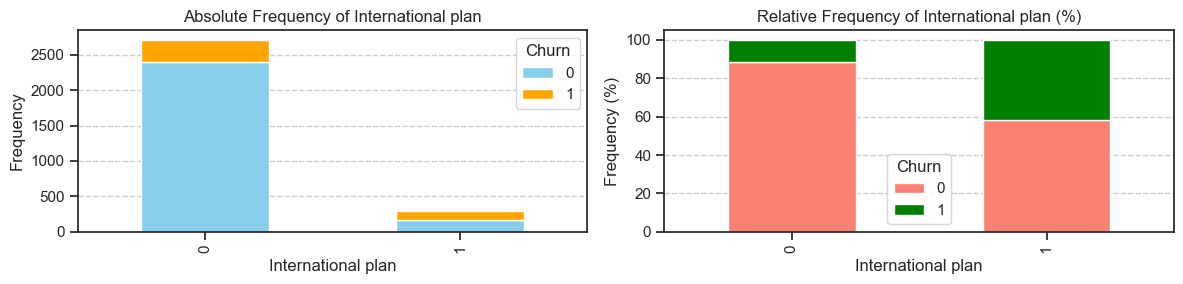

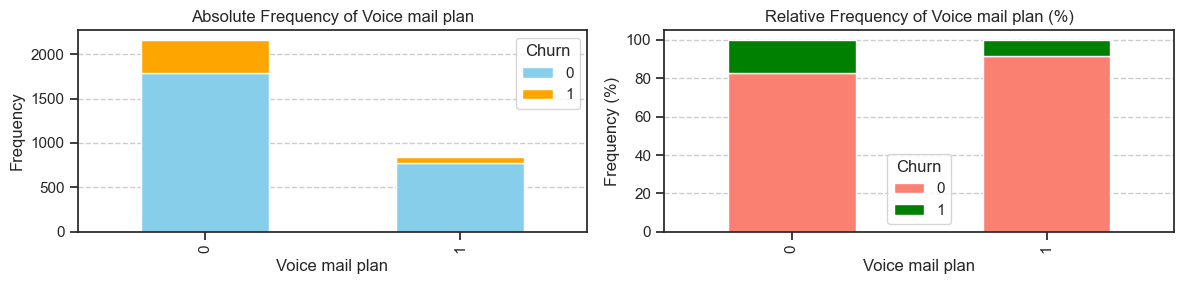

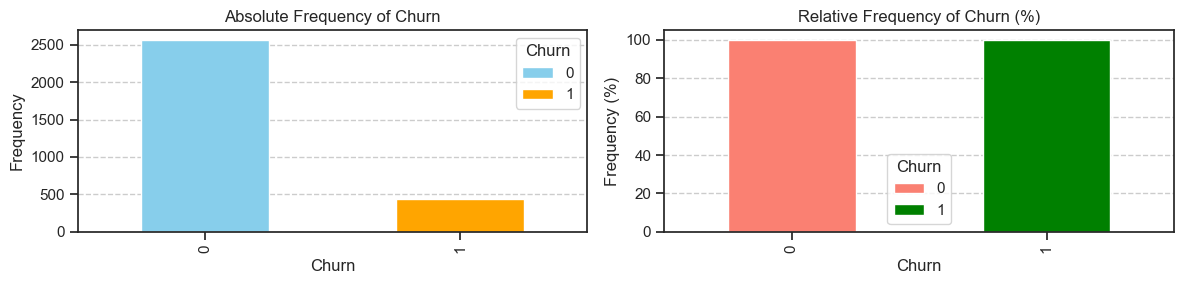

In [63]:
# Create frequency plots for plans by churn
def create_freq_plot(variable):

    plt.figure(figsize=(12, 3))

    churn_grouped = df.groupby([variable, "Churn"]).size().unstack(fill_value=0)
    
    # Absolute frequency
    plt.subplot(1, 2, 1)
    churn_grouped.plot(kind="bar", stacked=True, ax=plt.gca(), color=["skyblue", "orange"])
    plt.title(f"Absolute Frequency of {variable}")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--')

    # Corrected relative frequency (within each category)
    churn_grouped_rel = churn_grouped.div(churn_grouped.sum(axis=1), axis=0) * 100  # Percentage within each category
    
    # Relative frequency plot
    plt.subplot(1, 2, 2)
    churn_grouped_rel.plot(kind="bar", stacked=True, ax=plt.gca(), color=['salmon', 'green'])
    plt.title(f"Relative Frequency of {variable} (%)")
    plt.xlabel(variable)
    plt.ylabel("Frequency (%)")
    plt.grid(axis='y', linestyle='--')
    
    plt.tight_layout()
    plt.show()

for variable in categorical_variables:
    create_freq_plot(variable)

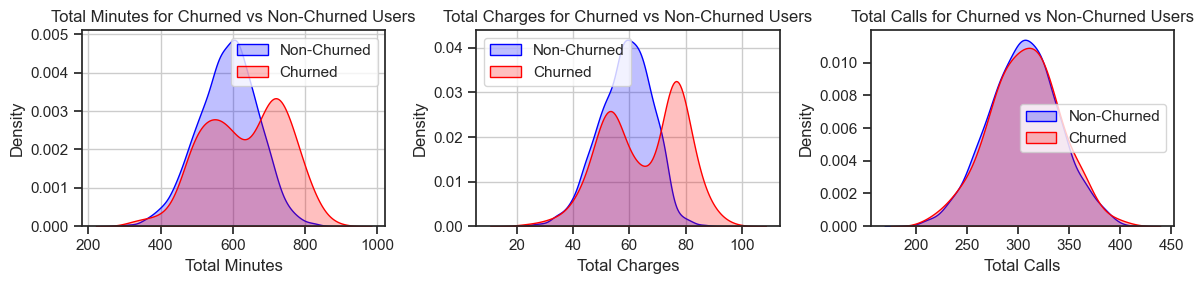

In [64]:
# KDE plot for Total_minutes
plt.figure(figsize=(12, 3))

plt.subplot(1, 3, 1)
sns.kdeplot(df[df['Churn'] == 0]['Total minutes'], label='Non-Churned', fill=True, color='blue')
sns.kdeplot(df[df['Churn'] == 1]['Total minutes'], label='Churned', fill=True, color='red')
plt.title('Total Minutes for Churned vs Non-Churned Users')
plt.xlabel('Total Minutes')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# KDE plot for Total_charge
plt.subplot(1, 3, 2)
sns.kdeplot(df[df['Churn'] == 0]['Total charges'], label='Non-Churned', fill=True, color='blue')
sns.kdeplot(df[df['Churn'] == 1]['Total charges'], label='Churned', fill=True, color='red')
plt.title('Total Charges for Churned vs Non-Churned Users')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# KDE plot for Total_calls
plt.subplot(1, 3, 3)
sns.kdeplot(df[df['Churn'] == 0]['Total calls'], label='Non-Churned', fill=True, color='blue')
sns.kdeplot(df[df['Churn'] == 1]['Total calls'], label='Churned', fill=True, color='red')
plt.title('Total Calls for Churned vs Non-Churned Users')
plt.xlabel('Total Calls')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


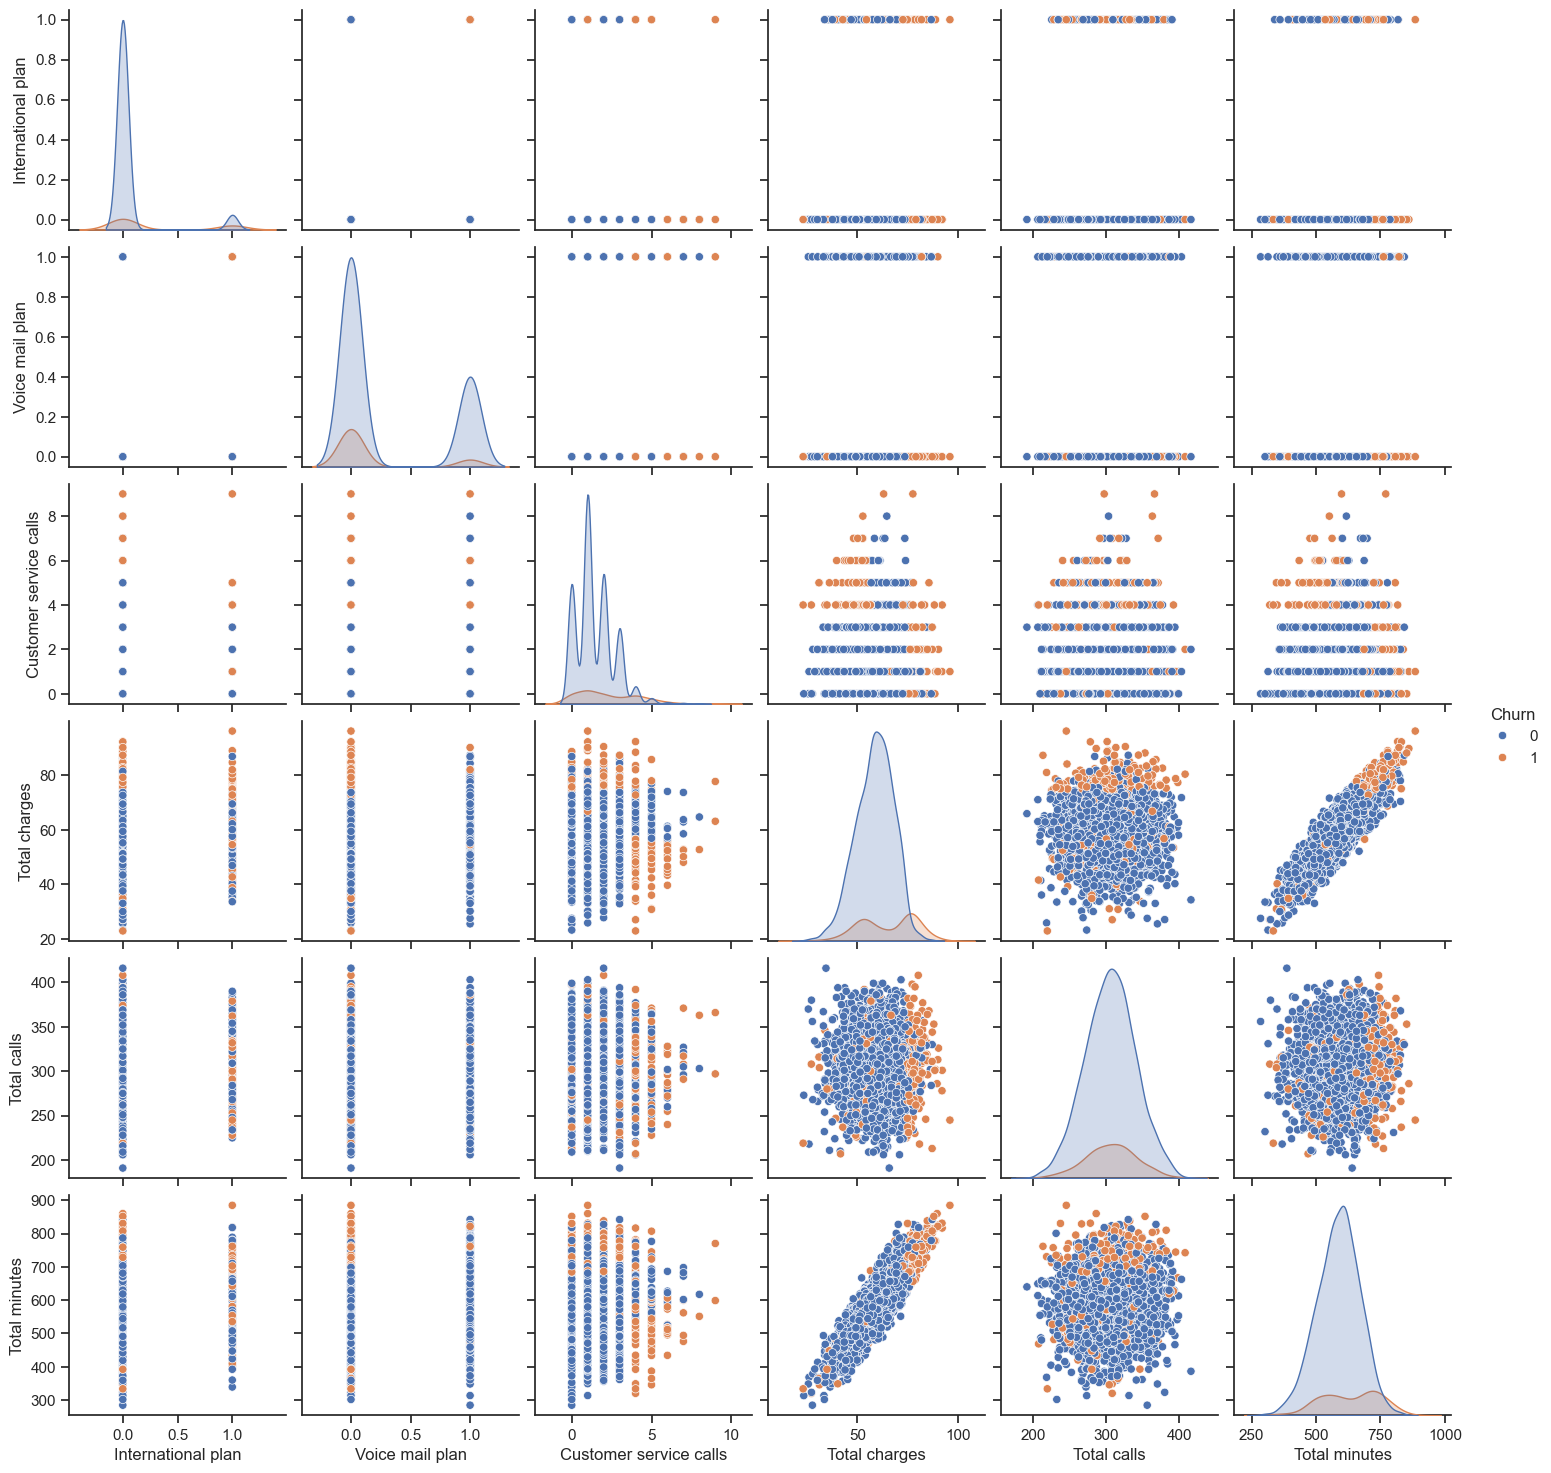

In [65]:
# Create correlation matrix
sns.set_theme(style="ticks")

df_scatter = df[['International plan',
       'Voice mail plan', 'Customer service calls',
       'Churn', 'Total charges', 'Total calls', 'Total minutes']]

sns.pairplot(df_scatter, hue="Churn")

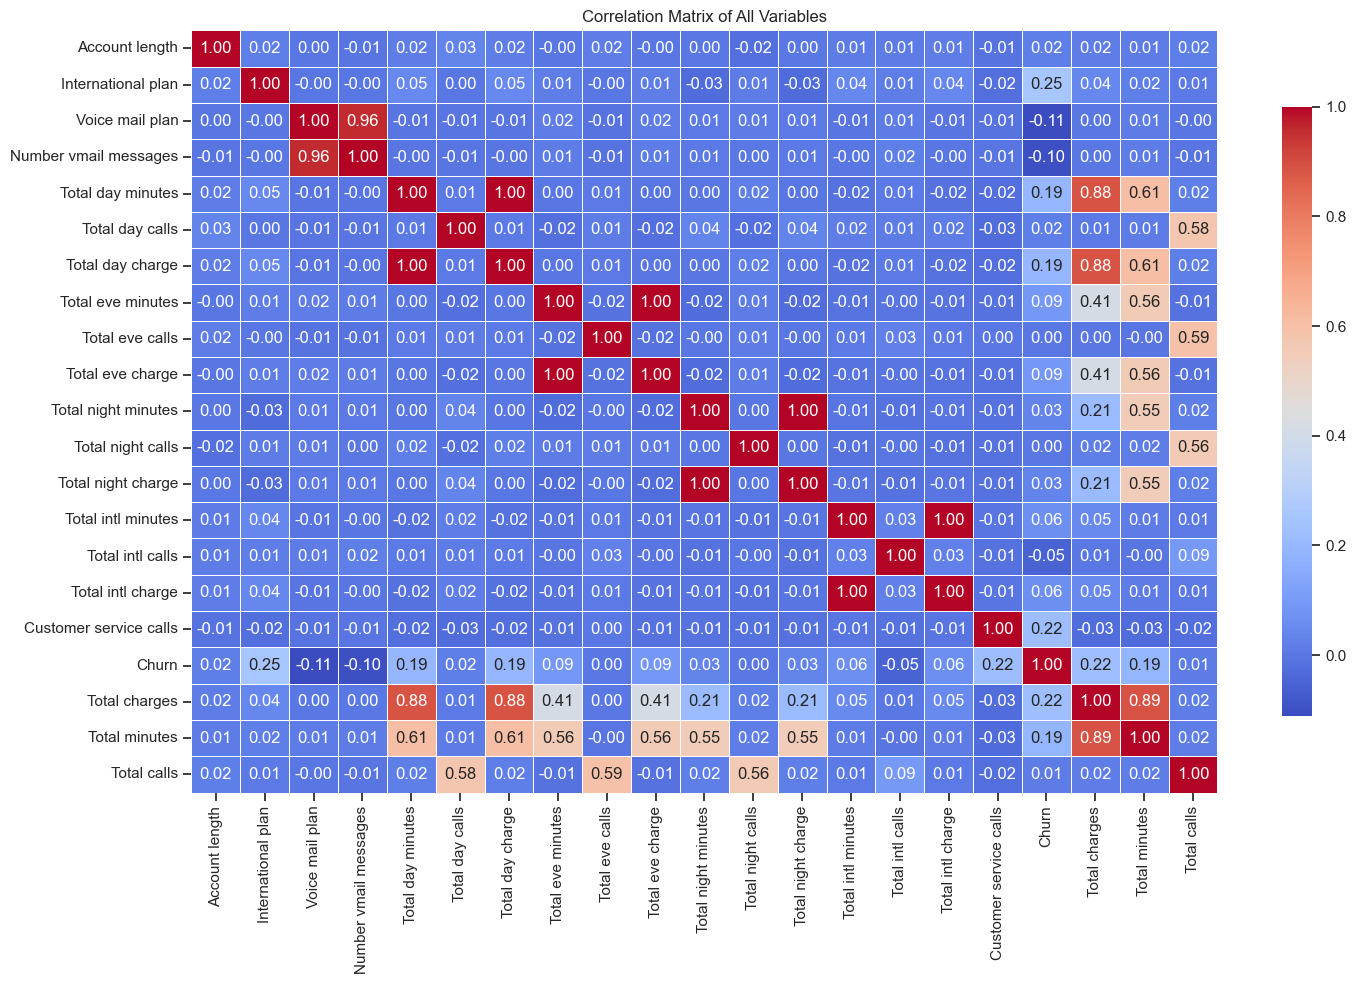

In [66]:
# Scatter Plot
# define numerical df
corr_df = df.drop(columns=['State', 'Area code'])

#  Compute the correlation matrix
corr_matrix = corr_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8}, linewidths=.5)

# Add title and adjust layout
plt.title('Correlation Matrix of All Variables')
plt.tight_layout()

# Display the heatmap
plt.show()

# <a id='toc4_'></a>[Questions from Assignment](#toc0_)

## <a id='toc4_1_'></a>[Question 1 (4 points)](#toc0_)

The CEO claims that 15% of customers churn are coming from international plan. Using the 
provided dataset validate the CEO’s statement and extract additional insights. (In the submitted 
notebook you should clearly state all the steps done to answer the questions) 

**Q1.1. – Is the CEO statement correct? [Yes, No] If not, what is the churn percentage? [Numeric]**

In [67]:
# filtering for churned customers only
churned_customers = df[df['Churn'] == True]
churned_customers.head()

# Calculating shares of int plan within churn
churned_customers["International plan"].value_counts(normalize=True)

International plan
0    0.724138
1    0.275862
Name: proportion, dtype: float64

**A:** The statement is **incorrect**. The correct churn percentage of churned users with an international plan is **28%**.

**Q1.2 – Provide three insights you extracted from the EDA analysis [Free text + code] 3 points**

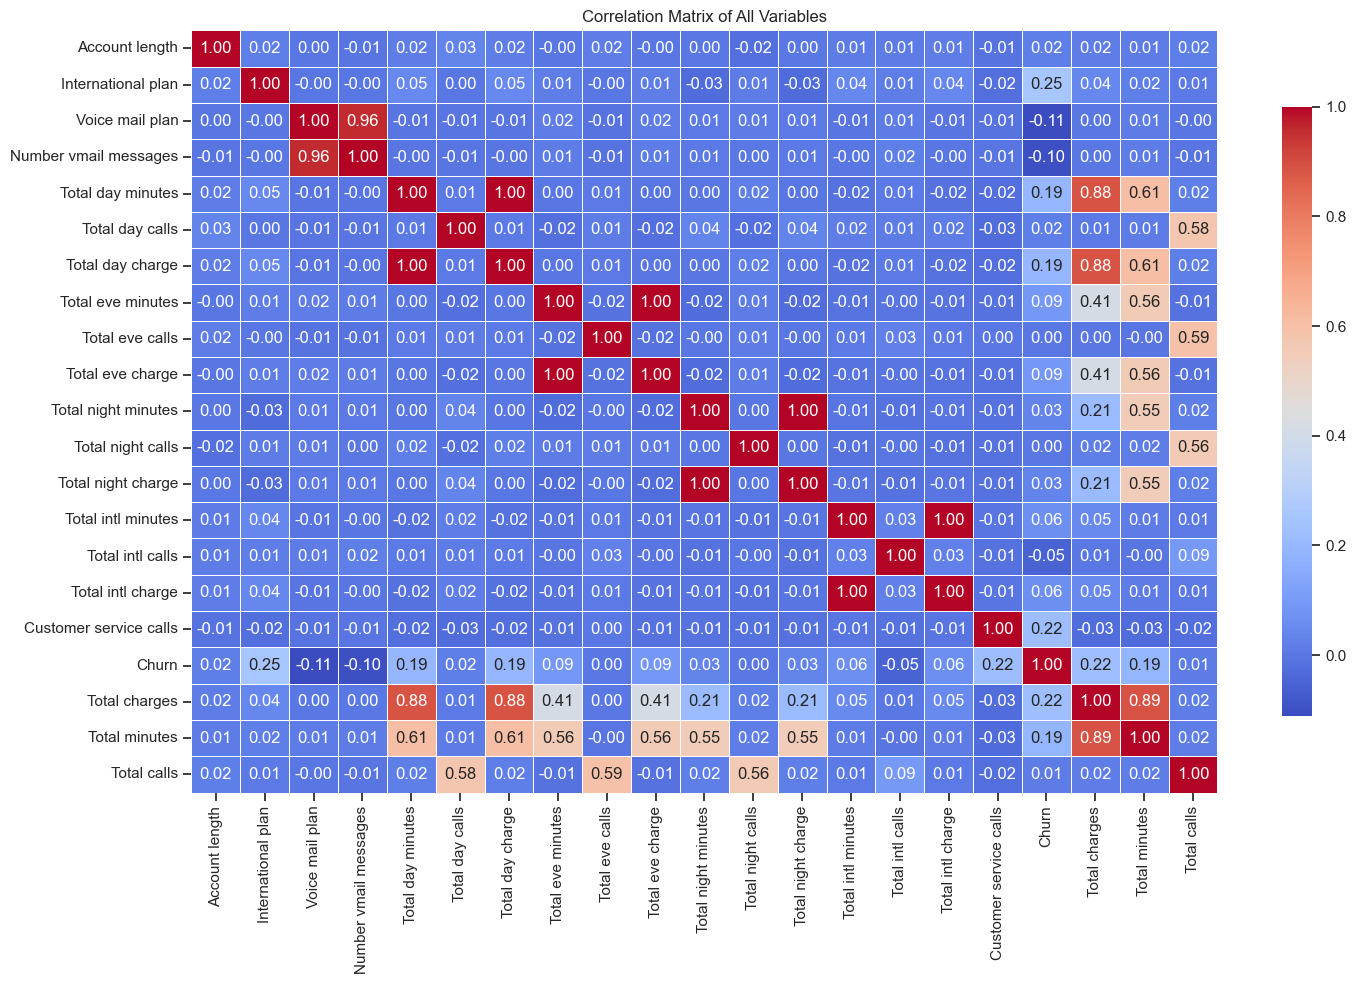

In [68]:
# Scatter Plot
# define numerical df
corr_df = df.drop(columns=['State', 'Area code'])

#  Compute the correlation matrix
corr_matrix = corr_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8}, linewidths=.5)

# Add title and adjust layout
plt.title('Correlation Matrix of All Variables')
plt.tight_layout()

# Display the heatmap
plt.show()

From the corr plot, we learned which variables are correlating more and less with Churn. We also learned that the specific time of day minutes are perfectlcy correlating with their respective charges, e.g., total day minutes perfectly correlates (corr = 1,0) with total day charges. Hence, we will drop the total minutes from the remaining dataframe.

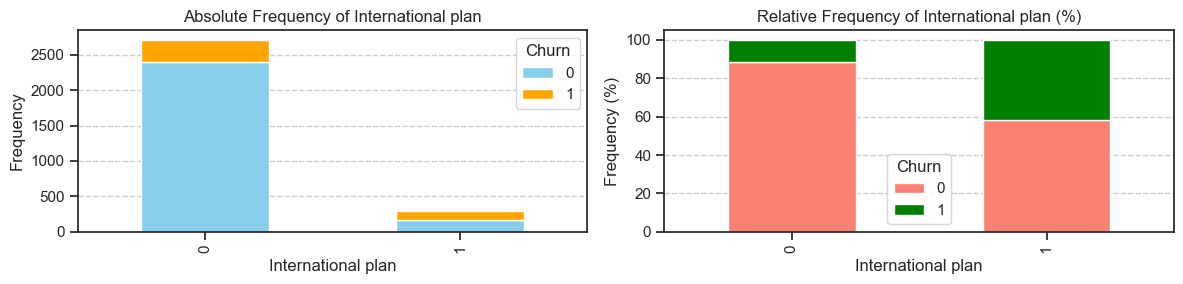

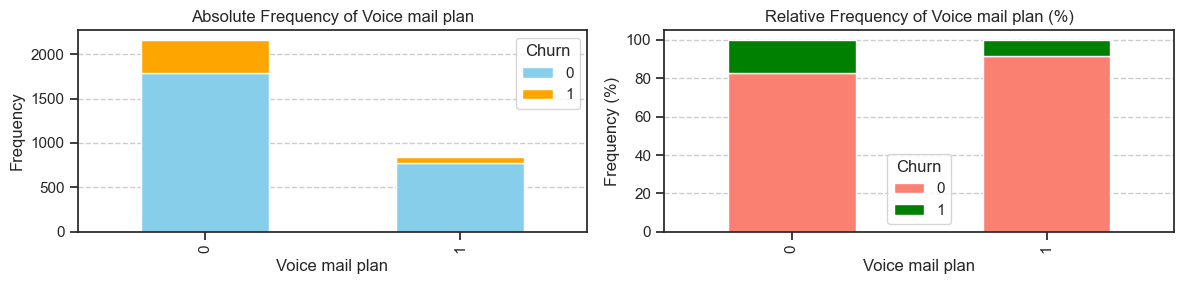

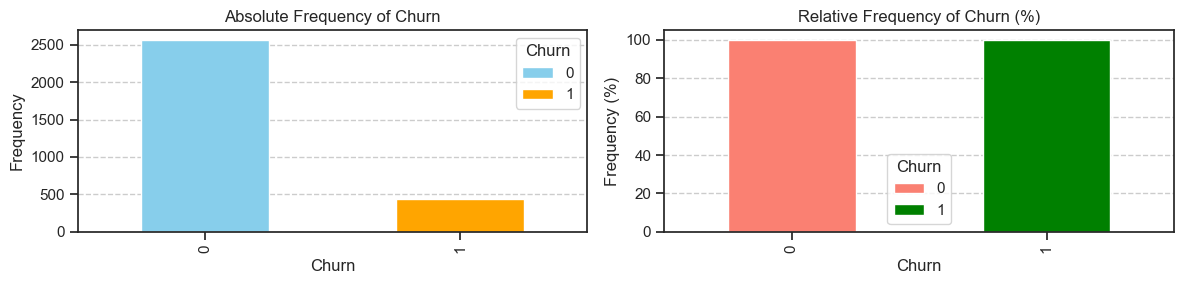

In [69]:
# Frequency Plot
def create_freq_plot(variable):

    plt.figure(figsize=(12, 3))

    churn_grouped = df.groupby([variable, "Churn"]).size().unstack(fill_value=0)
    
    # Absolute frequency
    plt.subplot(1, 2, 1)
    churn_grouped.plot(kind="bar", stacked=True, ax=plt.gca(), color=["skyblue", "orange"])
    plt.title(f"Absolute Frequency of {variable}")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--')

    # Corrected relative frequency (within each category)
    churn_grouped_rel = churn_grouped.div(churn_grouped.sum(axis=1), axis=0) * 100  # Percentage within each category
    
    # Relative frequency plot
    plt.subplot(1, 2, 2)
    churn_grouped_rel.plot(kind="bar", stacked=True, ax=plt.gca(), color=['salmon', 'green'])
    plt.title(f"Relative Frequency of {variable} (%)")
    plt.xlabel(variable)
    plt.ylabel("Frequency (%)")
    plt.grid(axis='y', linestyle='--')
    
    plt.tight_layout()
    plt.show()

for variable in categorical_variables:
    create_freq_plot(variable)

Looking at the graphs, customers with an international plan are more likely to churn. In contrast, having a voice mail plan is linked to lower churn rates, as only about 20% of customers without the plan churn, while churn is much lower among those with the plan. Overall, churn is relatively low, with 85.5% of customers staying. These findings suggest that certain features, like international plans, can increase churn risk

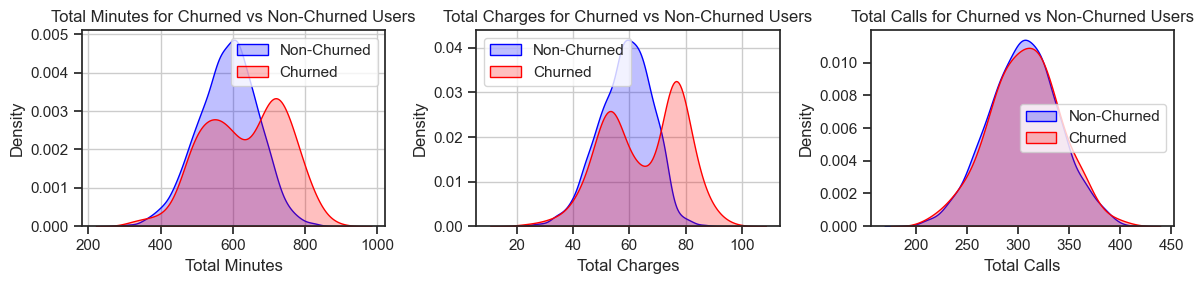

In [70]:
# KDE plot for Total_minutes
plt.figure(figsize=(12, 3))

plt.subplot(1, 3, 1)
sns.kdeplot(df[df['Churn'] == 0]['Total minutes'], label='Non-Churned', fill=True, color='blue')
sns.kdeplot(df[df['Churn'] == 1]['Total minutes'], label='Churned', fill=True, color='red')
plt.title('Total Minutes for Churned vs Non-Churned Users')
plt.xlabel('Total Minutes')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# KDE plot for Total_charge
plt.subplot(1, 3, 2)
sns.kdeplot(df[df['Churn'] == 0]['Total charges'], label='Non-Churned', fill=True, color='blue')
sns.kdeplot(df[df['Churn'] == 1]['Total charges'], label='Churned', fill=True, color='red')
plt.title('Total Charges for Churned vs Non-Churned Users')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# KDE plot for Total_calls
plt.subplot(1, 3, 3)
sns.kdeplot(df[df['Churn'] == 0]['Total calls'], label='Non-Churned', fill=True, color='blue')
sns.kdeplot(df[df['Churn'] == 1]['Total calls'], label='Churned', fill=True, color='red')
plt.title('Total Calls for Churned vs Non-Churned Users')
plt.xlabel('Total Calls')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()



From the last visualization, we observed that the distributions of minutes, charges, and calls for both churned and non-churned users appear mostly normal. However, when splitting them by churn status, we notice what seems to be a bimodal distribution for minutes and charges among the churned users. This suggests that churned users tend to have either significantly higher or lower values compared to non-churned users, who exhibit more concentrated distributions. 

This suggestion can be confirmed visually: Upon closer inspection, it can be observed that churned users generally have higher total minutes and charges than their non-churned counterparts. This observation aligns with our first hypothesis, indicating that higher charges and usage might be correlated with churn.

## <a id='toc4_2_'></a>[Question 2 (4 points)](#toc0_)

The executive team needs a robust predictive solution to identify customers most at risk of 
churning. Machine learning models can provide the insights required for targeted retention 
strategies. 
 
**2.1.  Which  kind  of  machine  learning  problem  is  Telecom  facing?  [Multiple  choice, regression, classification, recommendation systems, foundational model] 1 point** 

--> The Telecom is facing a **classification problem**. In this case, the goal is to predict a binary outcome, i.e., whether a customer will churn (1) or not churn (0)—which is a classic example of a classification task.

**Q2.2. Train two models that are adecuated to the problem. Justify why you chose those. [Free text + code] In the code document the hyperparamenter tunning, train test split and all the processing steps. 3 points**

In [71]:
# Split data in training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df[['Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages',
       'Total day calls', 'Total day charge',
       'Total eve calls', 'Total eve charge', 
       'Total night calls', 'Total night charge',
       'Total intl calls', 'Total intl charge', 'Customer service calls', 
       'Total charges', 'Total calls']]
y = df['Churn']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the entire feature set and transform it
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (2099, 16)
X_test shape: (900, 16)
y_train shape: (2099,)
y_test shape: (900,)


#### <a id='toc4_2_1_1_'></a>[Model A: Basic Logistic Regression](#toc0_)

This model was chosen as a baseline as the logistic regression is arguable the most simple and typical answer to a binary classifcation problem such as Telco Churn. A more advanced model will be developed afterwards, and compared to this. 

In [72]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the logistic regression model
logreg = LogisticRegression(
    max_iter=1000, 
    random_state=42,
    C=0.1,
    penalty='l1',
    solver='saga')

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8544444444444445
Confusion Matrix:
[[746  23]
 [108  23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       769
           1       0.50      0.18      0.26       131

    accuracy                           0.85       900
   macro avg       0.69      0.57      0.59       900
weighted avg       0.82      0.85      0.82       900



In [73]:
# LOG REGRESSION - HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=100000, random_state=42)

# Set up Grid Search
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.8544444444444445
Confusion Matrix:
[[746  23]
 [108  23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       769
           1       0.50      0.18      0.26       131

    accuracy                           0.85       900
   macro avg       0.69      0.57      0.59       900
weighted avg       0.82      0.85      0.82       900



#### <a id='toc4_2_1_2_'></a>[Model B: Random Forest Classifier](#toc0_)

This model was chosen because Random Forest is a powerful and flexible machine learning algorithm that can handle complex datasets. It is particularly effective for classification tasks like Telco Churn due to its ability to capture non-linear relationships and interactions between features. Additionally, Random Forest provides feature importance scores, which help in understanding the key factors influencing churn.

Random Forest was compared to XGBoost and a simple neural network, and it outperformed both in terms of accuracy and interpretability.

In [74]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    min_samples_split=5,
    n_estimators=50, 
    random_state=84, 
    bootstrap=False,
    max_depth=20,
    min_samples_leaf=2)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Classification Report:")
print(class_report_rf)

Random Forest Accuracy: 0.9733333333333334
Random Forest Confusion Matrix:
[[767   2]
 [ 22 109]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       769
           1       0.98      0.83      0.90       131

    accuracy                           0.97       900
   macro avg       0.98      0.91      0.94       900
weighted avg       0.97      0.97      0.97       900



In [75]:
# HYPERPARAMETER TUNING (RANDOM FOREST)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=84)

# Set up Grid Search
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best parameters: {best_params_rf}")

# Evaluate the best model
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Classification Report:")
print(class_report_rf)

Best parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest Accuracy: 0.9733333333333334
Random Forest Confusion Matrix:
[[767   2]
 [ 22 109]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       769
           1       0.98      0.83      0.90       131

    accuracy                           0.97       900
   macro avg       0.98      0.91      0.94       900
weighted avg       0.97      0.97      0.97       900



## <a id='toc4_3_'></a>[Question 3 (4 points)](#toc0_)

To ensure the predictive models are reliable, the taskforce must evaluate their performance 
using  appropriate  metrics.  This  evaluation  will  determine  which  model  is  best  suited  for 
deployment. 

**Q3.1. Which performance metric did you use to evaluate the performance? Why?  [Free text + code] 2 points**
The metric used to evaluate the performance was Accuracy, which is the percentage of observations predicted correctly. Accuracy is a straightforward and commonly used metric that provides a general sense of how well the model is performing overall.

However, in the context of churn prediction, where predicting actual positive cases (i.e., users who will churn) is particularly important, other metrics such as Precision, Recall, and F1-Score could also be considered. Precision measures the accuracy of the positive predictions, Recall measures the ability to capture all actual positives, and F1-Score provides a balance between Precision and Recall.

For the sake of this analysis, we will proceed with overall Accuracy, but it is important to note that in scenarios where the cost of false negatives (failing to predict churn) is high, Recall or F1-Score might be more appropriate metrics. 
 
**Q3.2. Which model provided the best results? [Free text] 2 points**

In this analysis, the Random Forest Classifier achieved the best results with an overall accuracy of 97.78% and a precision of 99%. In contrast, the logistic regression model achieved an accuracy of 85.44% and a precision of just 50%.

The logistic regression model's performance is particularly poor because simply predicting no churn for everyone would result in a similar overall accuracy. However, it is worth noting that the logistic regression model correctly predicts 50% of churned users, although it incorrectly predicts non-churned users to churn.

Summary of Results
Random Forest Classifier:
Accuracy: 97.78%
Precision: 99%
Logistic Regression:
Accuracy: 85.44%
Precision: 50%

## <a id='toc4_4_'></a>[Question 4 (4 points)](#toc0_)

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from feature_engineering import feature_engineering  # Import the function

# Apply FunctionTransformer to apply the preprocessing and feature engineering function
preprocess_transformer = FunctionTransformer(feature_engineering)

# Define numerical and categorical features
numerical_features = [
    'Account length', 'Number vmail messages', 'Total day calls', 'Total day charge',
    'Total eve calls', 'Total eve charge', 'Total night calls', 'Total night charge',
    'Total intl calls', 'Total intl charge', 'Customer service calls', 'Total charges', 'Total calls'
]
categorical_features = ['Area code', 'International plan', 'Voice mail plan']

# Numerical processing: Handle NaN & Apply Z-Normalization
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Replace NaN with median
    ('scaler', StandardScaler())  # Apply Z-normalization
])

# Categorical processing: One-Hot Encoding
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Convert categorical to numeric
])

# Combine both transformations into a ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Create the full pipeline with preprocessing + feature engineering + model
pipeline = Pipeline([
    ('feature_engineering', preprocess_transformer),  # Apply preprocessing and feature engineering
    ('preprocessor', preprocessor),  # Handle missing values, scale, and encode
    ('model', RandomForestClassifier(
        min_samples_split=5,
        n_estimators=200, 
        random_state=84, 
        bootstrap=False,
        max_depth=20,
        min_samples_leaf=2))
])

# Define features and target variable
file_name = "2767ML_assignment1_data.csv"
df = pd.read_csv(file_name)
X = df[['Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages',
       'Total day calls', 'Total day charge',
       'Total eve calls', 'Total eve charge', 
       'Total night calls', 'Total night charge',
       'Total intl calls', 'Total intl charge', 'Customer service calls']]
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = pipeline.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Classification Report:")
print(class_report_rf)

# Save the pipeline to a pickle file
with open('63529_Pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

/Users/marvinschumann/Library/CloudStorage/OneDrive-Personal/Documents/UNI/Nova SBE/03 Semesters/03 T3/T3 Machine Learning/feature_engineering.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({'Yes': 1, 'No' : 0}, inplace=True)  # changing "Yes" and "No" to 0 and 1


Random Forest Accuracy: 0.9755555555555555
Random Forest Confusion Matrix:
[[767   2]
 [ 20 111]]
Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       769
        True       0.98      0.85      0.91       131

    accuracy                           0.98       900
   macro avg       0.98      0.92      0.95       900
weighted avg       0.98      0.98      0.97       900



/Users/marvinschumann/Library/CloudStorage/OneDrive-Personal/Documents/UNI/Nova SBE/03 Semesters/03 T3/T3 Machine Learning/feature_engineering.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({'Yes': 1, 'No' : 0}, inplace=True)  # changing "Yes" and "No" to 0 and 1


In [77]:
# Test pickle file
import pandas as pd
import pickle

# Load the new dataset
file_name = "2767ML_assignment1_externalvalidation_data_toStudents.xls"
new_data = pd.read_excel(file_name)

# Assign new data to X_new
X_new = new_data

# Load the pipeline from the pickle file
with open('63529_Pipeline.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

# Predict on the new data
y_pred_new = loaded_pipeline.predict(X_new)

# Convert boolean predictions to integers (0 and 1)
y_pred_new = y_pred_new.astype(int)

# Output the predictions
print("Predictions for the new data:")
print(y_pred_new)

Predictions for the new data:
[0 0 0]


/Users/marvinschumann/Library/CloudStorage/OneDrive-Personal/Documents/UNI/Nova SBE/03 Semesters/03 T3/T3 Machine Learning/feature_engineering.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({'Yes': 1, 'No' : 0}, inplace=True)  # changing "Yes" and "No" to 0 and 1


## <a id='toc4_5_'></a>[Question 5 (4 points)](#toc0_)

The executive team requires actionable insights to guide the strategy to address customer churn 
effectively. Your analysis will directly inform their decisions 

**Q5.1 What customer characteristics most strongly influence churn? [Free text] 2 points**
According to the Random Forest model, the most important factors that influence customer churn are:

Total charges, with an importance score of 0.315.
Customer service calls, with an importance score of 0.146.
Total day charge, with an importance score of 0.125.
These factors show that higher total charges and frequent customer service calls are strong signs that a customer might leave.


**Q5.2 What actionable steps should the company take to reduce churn? Suggest two strategies. 
[Free text] 2 points**
To reduce churn, the company should consider these strategies:

Review Pricing and Charges: Look into how high total charges affect customer churn. Compare the benefits of keeping these customers with the costs if they leave. This will help decide if prices should be adjusted or if discounts should be offered to customers with high charges.

Improve Customer Service: Set up a special team to handle customers who call customer service often. When a customer reaches a certain number of calls, direct them to this team, which can offer special deals like free TV streaming services. This can help solve their problems better and make them happier, reducing the chance they will leave.

These strategies focus on the most important factors identified by the model and can help the company address key reasons why customers might leave.

Most Important Features:
                   Feature  Importance
11           Total charges    0.315091
10  Customer service calls    0.146253
3         Total day charge    0.124692
9        Total intl charge    0.058315
8         Total intl calls    0.053873
17    International plan_1    0.040488
16    International plan_0    0.039589
5         Total eve charge    0.036778
7       Total night charge    0.023728
18       Voice mail plan_0    0.021847
1    Number vmail messages    0.020752
12             Total calls    0.019671
2          Total day calls    0.018940
6        Total night calls    0.018646
4          Total eve calls    0.018270
19       Voice mail plan_1    0.018259
0           Account length    0.018234
14           Area code_415    0.002990
13           Area code_408    0.001972
15           Area code_510    0.001613


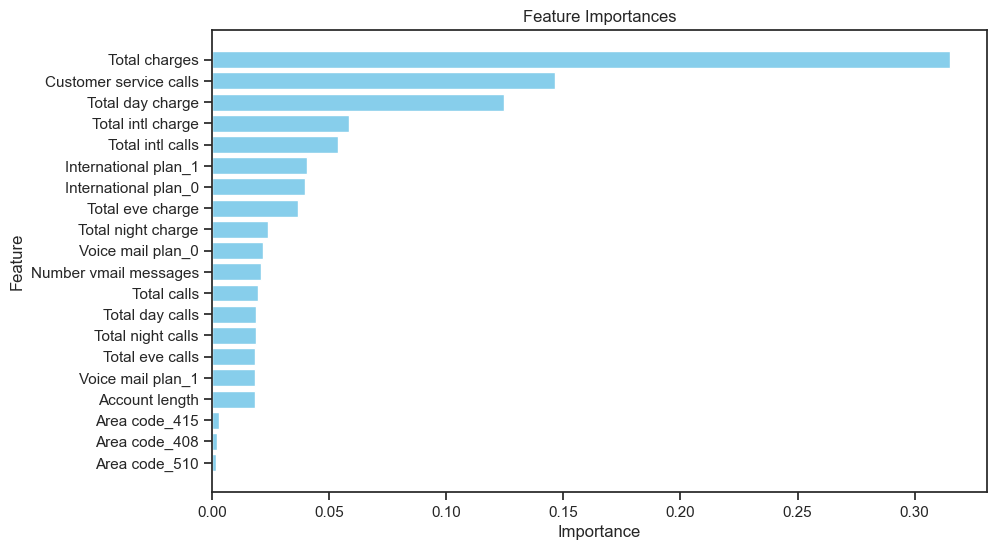

In [79]:
# Plotting most important features for Random Forest Classifier
import matplotlib.pyplot as plt

# Extract the trained Random Forest model from the pipeline
rf_model = pipeline.named_steps['model']

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get the feature names after preprocessing
preprocessor = pipeline.named_steps['preprocessor']
onehot_columns = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)
all_features = np.concatenate([numerical_features, onehot_columns])

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the most important features
print("Most Important Features:")
print(feature_importances_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [81]:
pip list --format=freeze | grep -v '@ file' > 63529_requirements.txt

Note: you may need to restart the kernel to use updated packages.
